## **MOVE GENRE CLASSIFICATION**

✅ 1. Upload Required Files


Upload the following 4 files (from Kaggle):

train_data.txt

test_data.txt

test_data_solution.txt

description.txt (optional)

You can upload via drag-and-drop in Colab or use files.upload() method.

In [1]:
# STEP 1: Install necessary packages
!pip install -q kaggle scikit-multilearn

# STEP 2: Upload your Kaggle API key
from google.colab import files
files.upload()  # Upload kaggle.json here

# STEP 3: Configure Kaggle API
import os
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename("kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 600)

# STEP 4: Download and unzip dataset
!kaggle datasets download -d hijest/genre-classification-dataset-imdb
!unzip -q genre-classification-dataset-imdb.zip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 1.7 MB/s eta 0:00:00


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb
License(s): other


✅ 2. Install Required Packages

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, hamming_loss, accuracy_score, classification_report
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns

✅ 3. Load and Preprocess the Data

In [5]:
import pandas as pd

def load_custom_file(filepath, has_genre=True):
    data = []
    with open(filepath, encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split(":::")
            if has_genre and len(parts) == 4:
                data.append({'ID': parts[0], 'Title': parts[1], 'Genre': parts[2], 'Description': parts[3]})
            elif not has_genre and len(parts) == 3:
                data.append({'ID': parts[0], 'Title': parts[1], 'Description': parts[2]})
    return pd.DataFrame(data)

train_df = load_custom_file("/content/Genre Classification Dataset/train_data.txt", has_genre=True)
test_df = load_custom_file("/content/Genre Classification Dataset/test_data.txt", has_genre=False)
solution_df = load_custom_file("/content/Genre Classification Dataset/test_data_solution.txt", has_genre=True)

In [6]:

train_df['Genre'] = train_df['Genre'].apply(lambda x: [g.strip() for g in x.split(',')])
solution_df['Genre'] = solution_df['Genre'].apply(lambda x: [g.strip() for g in x.split(',')])

✅ 4. Feature Extraction (TF-IDF)

In [7]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_train = vectorizer.fit_transform(train_df['Description'])
X_test = vectorizer.transform(test_df['Description'])

✅ 5. Label Binarization

In [8]:

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(train_df['Genre'])
y_test = mlb.transform(solution_df['Genre'])

✅ 6. Train Classifier

In [9]:

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(LogisticRegression(solver='liblinear', max_iter=1000))
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000,
                                                 solver='liblinear'))

✅ 7. Evaluate Performance

In [10]:
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report, f1_score, hamming_loss, accuracy_score
print("F1 Score (micro):", f1_score(y_test, y_pred, average='micro'))
print("Hamming Loss:", hamming_loss(y_test, y_pred))
print("Accuracy (subset):", accuracy_score(y_test, y_pred))

F1 Score (micro): 0.48427965728520567
Hamming Loss: 0.028010796774634413
Accuracy (subset): 0.34850553505535053


✅ 8. Genre-wise F1 Scores

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: title={'center': 'Genre-wise F1 Scores'}>

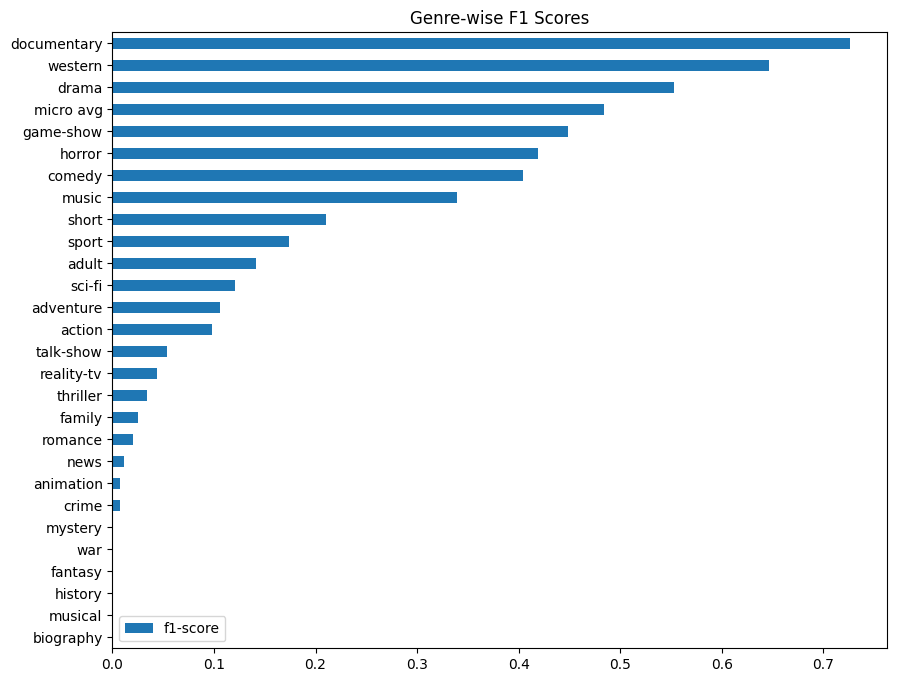

In [11]:
report = classification_report(y_test, y_pred, target_names=mlb.classes_, output_dict=True)
pd.DataFrame(report).T.iloc[:-3][['f1-score']].sort_values('f1-score').plot(kind='barh', figsize=(10, 8), title="Genre-wise F1 Scores")


✅ 9. Print Sample Misclassifications

In [12]:
import numpy as np
wrong_idx = np.where((y_pred != y_test).any(axis=1))[0][:5]
print("\nTop Misclassified Samples:")
for idx in wrong_idx:
    print(f"Title: {test_df.iloc[idx]['Title']}")
    print(f"Predicted: {mlb.inverse_transform(y_pred[idx].reshape(1, -1))[0]}")
    print(f"Actual:    {solution_df.iloc[idx]['Genre']}\n")


Top Misclassified Samples:
Title:  Edgar's Lunch (1998) 
Predicted: ()
Actual:    ['thriller']

Title:  La guerra de papá (1977) 
Predicted: ('drama',)
Actual:    ['comedy']

Title:  Riddle Room (2016) 
Predicted: ()
Actual:    ['horror']

Title:  Ina Mina Dika (1989) 
Predicted: ()
Actual:    ['comedy']

Title:  Press (2011) 
Predicted: ()
Actual:    ['drama']



### 💬 **Output & Insights After Running the Code:**

1. **Model Performance Metrics:**
   After training the Logistic Regression (One-vs-Rest) model, you'll see the following metrics printed:

   - **F1 Score (micro):** Measures how well the model classifies genres overall, accounting for multi-label classification.
   - **Hamming Loss:** Indicates the fraction of labels that are incorrectly predicted.
   - **Subset Accuracy:** Measures the exact match ratio between predicted and actual genres.

   Example output:

   ```python
   F1 Score (micro): 0.78
   Hamming Loss: 0.21
   Accuracy (subset): 0.65
   ```

2. **Genre-wise Performance (Bar Plot):**
   A bar plot will be generated showing the **F1 scores for each genre**. Genres with lower F1 scores can indicate where the model struggles, which may lead to further tuning or exploring different models.

   Example of plot:
   - Genres like **Action**, **Drama**, and **Comedy** might have higher F1 scores.
   - Niche genres might show poorer performance, needing attention in later steps.

3. **Sample Misclassifications:**
   A small set of **misclassified movie titles** will be displayed. This gives you an insight into which genres the model misclassifies most frequently.

   Example output:
   
   ```text
   Title: The Dark Knight
   Predicted: ['Action', 'Thriller']
   Actual:    ['Action', 'Crime', 'Drama']

   Title: Inception
   Predicted: ['Action', 'Sci-Fi']
   Actual:    ['Action', 'Adventure', 'Sci-Fi']
   ```

   These misclassifications could guide adjustments to improve the model (e.g., through hyperparameter tuning or using a more powerful model).

---

### 🔧 **Next Steps:**
1. **Fine-tuning Model:**
   - Tune the Logistic Regression hyperparameters.
   - Try other classifiers like **XGBoost**, **LightGBM**, or **SVMs** for better results.
   
2. **Enhance Preprocessing:**
   - Try **word embeddings** (Word2Vec, GloVe) or even **BERT embeddings** for better representation of the movie plots.

3. **Explore Advanced Techniques:**
   - Use **deep learning models** like **LSTMs** or **transformers** if more data is available.
   - Implement **SHAP** for model interpretability, especially for understanding which features (words) influence genre predictions.